In [1]:
library(ggplot2)
cobre_pd = readRDS("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/Figure 1 Differential analysis/cobre_pd.rds")
cobre_beta = readRDS("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/Figure 1 Differential analysis/cobre_beta.rds")
anno = readRDS("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/Figure 1 Differential analysis/anno_450k.rds")

stem_pd = cobre_pd

stem_control = subset(stem_pd,Sample_Group =='control')
stem_case = subset(stem_pd,Sample_Group =='obese')


In [2]:
anno_promoter = anno[anno$UCSC_RefGene_Group%in%c('TSS200','TSS1500'),]
anno_promoter


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname




DataFrame with 121265 rows and 3 columns
                  Name UCSC_RefGene_Name UCSC_RefGene_Group
           <character>       <character>        <character>
cg00212031  cg00212031            TTTY14             TSS200
cg01707559  cg01707559             TBL1Y             TSS200
cg02011394  cg02011394             TSPY4            TSS1500
cg02233190  cg02233190            EIF1AY             TSS200
cg02839557  cg02839557             TBL1Y             TSS200
...                ...               ...                ...
cg27501458  cg27501458           SULT4A1            TSS1500
cg27545494  cg27545494             PPIL2             TSS200
cg27611781  cg27611781              PDXP            TSS1500
cg27614432  cg27614432              SELM             TSS200
cg27662611  cg27662611              MAFF             TSS200

In [12]:

cobre_beta_promoter = cobre_beta[rownames(cobre_beta)%in%anno_promoter$Name,]
cobre_beta_promoter[1:5,1:5]

,MT11,MT12,MT13,MT14,MT16
cg00001349,0.78620226,0.73032561,0.76520469,0.67338570,0.73514965
cg00002719,0.02831629,0.02230098,0.02178017,0.01563108,0.02869859
cg00031456,0.03417605,0.03549631,0.03351288,0.03866676,0.02281487
cg00035237,0.02877563,0.03298517,0.02903897,0.01890396,0.02866490
cg00040367,0.02845226,0.03766516,0.03401492,0.04354911,0.03929100


In [13]:
dim(cobre_beta_promoter)

[1] 106528     72

In [3]:
#STEMNESS
SC.meta <- cobre_pd[,c('Sample_Name','Sample_Group')]
rownames(SC.meta) = SC.meta$Sample_Name
#expr.data <- as.matrix(cobre_beta_promoter)
expr.data <- as.matrix(cobre_beta)

probs   <- t(t(expr.data)/apply(expr.data,2,sum))
probs[is.na(probs)] <- 0
log.probs <- log(probs)
log.probs[which(is.infinite(log.probs))] <- 0
SC.meta$cell.entropy <- -apply(probs*log.probs/log(nrow(expr.data)),2,sum)
SC.entropy <- tapply(SC.meta$cell.entropy, SC.meta$Sample_Name, median)
SC.entropy <- tapply(SC.meta$cell.entropy, SC.meta$Sample_Name, median)
SC.entropy <- data.frame(Sample_Name=row.names(SC.entropy),Plasticity=SC.entropy)

#Population Size
Cluster.cell.rate <- table(SC.meta$Sample_Name)/nrow(SC.meta)
SC.entropy$Proportion <- Cluster.cell.rate[row.names(SC.entropy)]
SC.entropy$scaled.Plasticity=(SC.entropy$Plasticity-min(SC.entropy$Plasticity))/(max(SC.entropy$Plasticity)-min(SC.entropy$Plasticity))

SC.entropy_sample_2 = merge(SC.meta,SC.entropy,by= 'Sample_Name')
entropy_cobre_control = SC.entropy_sample_2[SC.entropy_sample_2$Sample_Group=='control',]
entropy_cobre_case = SC.entropy_sample_2[SC.entropy_sample_2$Sample_Group=='obese',]


In [4]:
SC.entropy_sample_2 = merge(SC.meta,SC.entropy,by= 'Sample_Name')
entropy_cobre_control = SC.entropy_sample_2[SC.entropy_sample_2$Sample_Group=='control',]
entropy_cobre_case = SC.entropy_sample_2[SC.entropy_sample_2$Sample_Group=='obese',]

In [5]:
entropy_wxtest_scaled = wilcox.test(entropy_cobre_control$scaled.Plasticity,entropy_cobre_case$scaled.Plasticity)
entropy_wxtest_scaled


	Wilcoxon rank sum exact test

data:  entropy_cobre_control$scaled.Plasticity and entropy_cobre_case$scaled.Plasticity
W = 414, p-value = 0.008452
alternative hypothesis: true location shift is not equal to 0


In [20]:
lower_bound <- quantile(SC.entropy_sample_2$scaled.Plasticity, 0.025)
upper_bound <- quantile(SC.entropy_sample_2$scaled.Plasticity, 0.975)

In [23]:
lower_bound <- quantile(SC.entropy_sample_2$cell.entropy, 0.025)
upper_bound <- quantile(SC.entropy_sample_2$cell.entropy, 0.975)
lower_bound
upper_bound

2.5% 
0.9351341

97.5% 
0.9393206

In [29]:
SC.entropy_sample_2_noout = SC.entropy_sample_2[SC.entropy_sample_2$scaled.Plasticity<0.8,]
SC.entropy_sample_2_noout = SC.entropy_sample_2_noout[SC.entropy_sample_2_noout$scaled.Plasticity>0.2,]

entropy_cobre_control_noout = SC.entropy_sample_2_noout[SC.entropy_sample_2_noout$Sample_Group=='control',]
entropy_cobre_case_noout = SC.entropy_sample_2_noout[SC.entropy_sample_2_noout$Sample_Group=='obese',]
entropy_wxtest_scaled = wilcox.test(entropy_cobre_control_noout$cell.entropy,entropy_cobre_case_noout$cell.entropy)
entropy_wxtest_scaled


	Wilcoxon rank sum exact test

data:  entropy_cobre_control_noout$cell.entropy and entropy_cobre_case_noout$cell.entropy
W = 388, p-value = 0.04738
alternative hypothesis: true location shift is not equal to 0


In [6]:
ggplot(SC.entropy_sample_2_noout, aes(x = Sample_Group, y = cell.entropy, fill = Sample_Group)) +
  geom_violin(alpha = 0.5,trim=FALSE) +
  geom_point(position = position_jitter(seed = 1, width = 0.2)) 


ggplot(SC.entropy_sample_2_noout, aes(x = Sample_Group,y = scaled.Plasticity,fill=Sample_Group)) + 
  geom_violin()+ ggtitle("Scaled.Plasticity") +xlab('Sample Group')+theme_bw()+
  geom_point(position = position_jitter(seed = 1, width = 0.2)) 


ERROR: Error in eval(expr, envir, enclos): object 'SC.entropy_sample_2_noout' not found


png 
  2

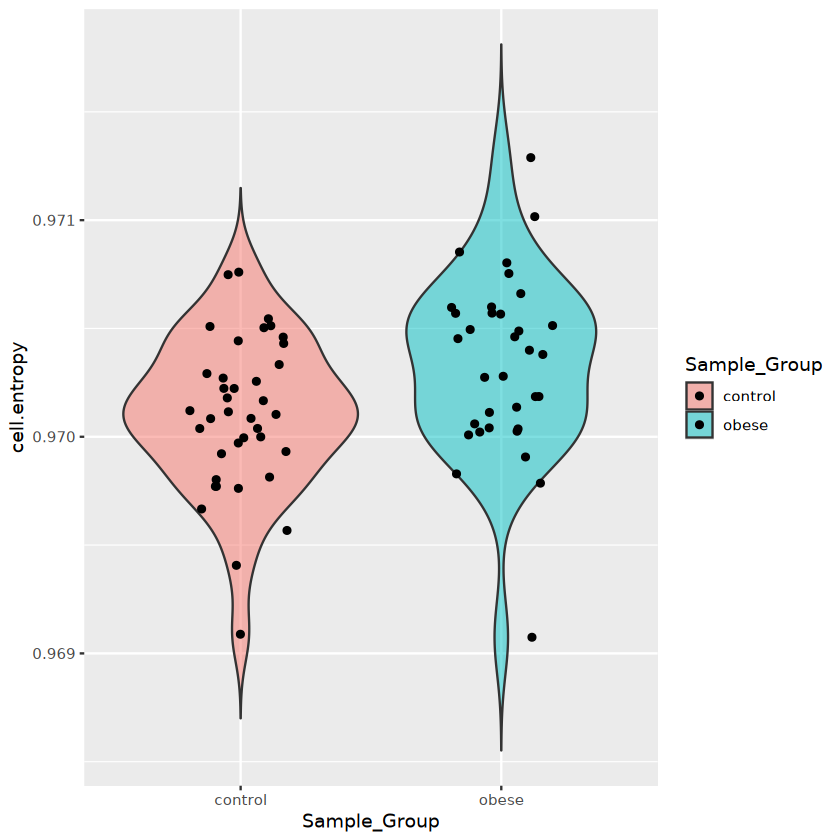

In [15]:
#ggplot(SC.entropy_sample_2, aes(x = "",y = cell.entropy,fill=Sample_Group)) + 
#  geom_violin()+ ggtitle("Cell Entropy") +xlab('Sample Group')+
#  geom_text(x=1.5,y=0.9,label = "Wilcox p-val: 0.008452",color='red')+
#  geom_dotplot(binaxis='y', stackdir='center', dotsize=1)


ggplot(SC.entropy_sample_2, aes(x = Sample_Group, y = cell.entropy, fill = Sample_Group)) +
  geom_violin(alpha = 0.5,trim=FALSE) +
  geom_point(position = position_jitter(seed = 1, width = 0.2)) 

pdf('stemness_scaled.pdf',width=5,height=4)
ggplot(SC.entropy_sample_2, aes(x = Sample_Group,y = scaled.Plasticity,fill=Sample_Group)) + 
  geom_violin(alpha = 0.5,trim=FALSE)+ ggtitle("Scaled Stemness Score") +xlab('Sample Group')+
    stat_summary(fun.data = "mean_cl_boot", geom = "crossbar",
               colour = "black", width = 0.2)+
    theme_minimal()
dev.off()
  #geom_point(position = position_jitter(seed = 1, width = 0.2)) 


In [19]:
png('stemness_scaled.png',width=4,height=3,unit='in',res=600)
ggplot(SC.entropy_sample_2, aes(x = Sample_Group,y = scaled.Plasticity,fill=Sample_Group)) + 
  geom_violin(alpha = 0.5)+ ggtitle("Scaled Stemness Score") +
    ylab('Scaled Stemness Score')+xlab('Sample Group')+
    stat_summary(fun.data = "mean_cl_boot", geom = "crossbar",
               colour = "black", width = 0.2)+
    theme_minimal()
dev.off()

png 
  2